In [2]:
from har_datasets.dataset.har_dataset import HARDataset
from har_datasets.supported.getter import DatasetId, get_har_dataset_cfg_and_parser

In [3]:
cfg, parse = get_har_dataset_cfg_and_parser(DatasetId.DAPHNET)
dataset = HARDataset(cfg, parse, override_cache=True)

Creating config hash...
Loading config hash...
Loading data...
Checking data format...
Resampling data...
Selecting activities...
Selecting channels...
Generating windows...


Saving windows: 100%|██████████| 1614/1614 [00:00<00:00, 2507.06it/s]


In [5]:
train_loader, val_loader, test_loader = dataset.get_dataloaders()

subject_id
9    440
6    263
8    254
3    196
1    171
2    126
5     93
7     71
Name: count, dtype: int64
activity_id
2    1614
Name: count, dtype: int64
train: 849 | val: 325 | test: 440


In [43]:
weights = dataset.get_class_weights(test_loader)
len(weights)

1

In [6]:
dataset.window_index
assert dataset.windows is not None
dataset.windows[0]

,shank_acc_x,shank_acc_y,shank_acc_z,thigh_acc_x,thigh_acc_y,thigh_acc_z,trunk_acc_x,trunk_acc_y,trunk_acc_z
247791,-383.0,892.00,297.00,-245.0,907.0,131.0,126.0,885.00,0.0
247792,-535.0,754.00,148.00,-454.0,833.0,202.0,19.0,933.00,-126.0
247793,-555.0,735.00,79.00,-490.0,861.0,292.0,29.0,838.00,19.0
247794,-444.0,882.00,9.00,-209.0,1055.0,252.0,0.0,1019.00,-174.0
247795,-282.0,1088.00,59.00,127.0,1111.0,30.0,-58.0,1085.00,-97.0
...,...,...,...,...,...,...,...,...,...
247850,-505.0,1078.00,544.00,-390.0,1250.0,-70.0,-29.0,619.00,184.0
247851,-131.0,1117.00,316.00,627.0,648.0,232.0,-97.0,657.00,135.0
247852,-20.0,1264.00,257.00,727.0,981.0,282.0,-339.0,809.00,155.0
247853,90.0,1500.00,574.00,918.0,1314.0,111.0,-300.0,1019.00,97.0


torch.Size([32, 64, 9])


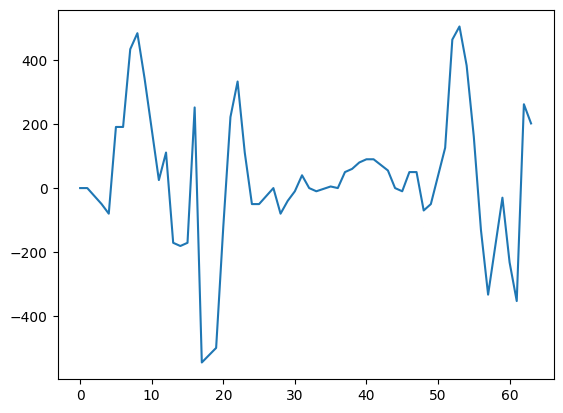

In [20]:
from matplotlib import pyplot as plt

y, x1, x2 = next(iter(train_loader))
print(x1.shape)

plt.plot(x1[0, :, 0])
plt.show()